In [108]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [109]:
t = sp.symbols('t', real=True)
x = sp.Function('x')
gamma, omega_0, F_0, omega_d = sp.symbols('gamma omega_0 F_0 omega_d', real=True, positive=True)
x0, v0 = sp.symbols('x0 v0', real=True)

In [110]:
# Równanie oscylatora
# Oscylator harmoniczny bez tłumienia i wymuszenia
equation_1 = sp.Eq(x(t).diff(t, t) + omega_0**2 * x(t), 0)  
 # Wymuszenie kosinusoidalne
equation_2 = sp.Eq(x(t).diff(t, t) + omega_0**2 * x(t), F_0 * sp.cos(omega_d * t)) 
 # Tłumienie bez wymuszenia
equation_3 = sp.Eq(x(t).diff(t, t) + 2 * gamma * x(t).diff(t) + omega_0**2 * x(t), 0) 
 # Tłumienie z wymuszeniem kosinusoidalnym
equation_4 = sp.Eq(x(t).diff(t, t) + 2 * gamma * x(t).diff(t) + omega_0**2 * x(t), F_0 * sp.cos(omega_d * t)) 

In [111]:
equation_2

Eq(omega_0**2*x(t) + Derivative(x(t), (t, 2)), F_0*cos(omega_d*t))

In [112]:
equation_4

Eq(2*gamma*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2)), F_0*cos(omega_d*t))

In [113]:
solution_1 = sp.dsolve(equation_1, x(t), ics={x(0): x0, x(t).diff(t).subs(t,0): v0})
solution_2 = sp.dsolve(equation_2, x(t), ics={x(0): x0, x(t).diff(t).subs(t,0): v0})
solution_3 = sp.dsolve(equation_3, x(t), ics={x(0): x0, x(t).diff(t).subs(t,0): v0})
solution_4 = sp.dsolve(equation_4, x(t), ics={x(0): x0, x(t).diff(t).subs(t,0): v0})

In [114]:
params1 = {omega_0: 1, x0: 1, v0: 0}
params2 = {omega_0: 1, F_0: 1, omega_d: 0.2, x0: 1, v0: 0}
params3 = {omega_0: 1, gamma: 0.2, x0: 1, v0: 0}
params4 = {omega_0: 1, gamma: 0.2, F_0: 1, omega_d: 1, x0: 1, v0: 0}

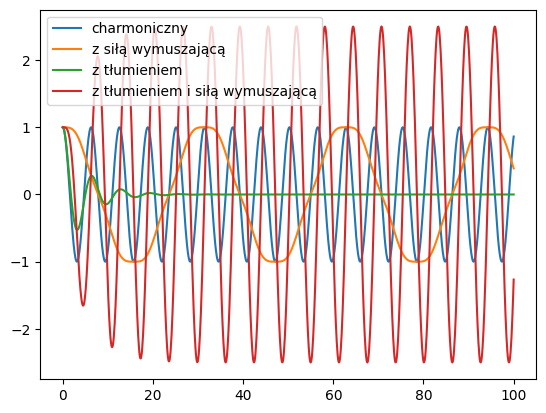

In [115]:
t_values = np.linspace(0, 100, 1000)
x_values1 = sp.lambdify(t, solution_1.rhs.subs(params1))(t_values)
x_values2 = sp.lambdify(t, solution_2.rhs.subs(params2))(t_values)
x_values3 = sp.lambdify(t, solution_3.rhs.subs(params3))(t_values)
x_values4 = sp.lambdify(t, solution_4.rhs.subs(params4))(t_values)

plt.plot(t_values, x_values1, label='charmoniczny')
plt.plot(t_values, x_values2, label='z siłą wymuszającą')
plt.plot(t_values, x_values3, label='z tłumieniem')
plt.plot(t_values, x_values4, label='z tłumieniem i siłą wymuszającą')
plt.legend()
plt.show()